# **MNIST Multilayer-Perceptron (MLP)**

In this notebook we want to give you an intuition about how to approach a computer vision problem with the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. First, we want you to explore the dataset and identify common pitfalls that can occur when working on computer vision tasks. Afterwards, you implement your first neural network, a multilayer perceptron, and train it to be a classifier for the MNIST dataset. Finally, you evaluate your model and take a look on the samples that were misclassified.

<br>

**Task:**

- Please solve all the tasks with code.
- You are free to use any python package you like, however, the imports should be enough to solve all the tasks.
- Questions (marked with QUESTION tag) requires you to write a short and concise text.

**Note:**
- Keep in mind that there is not only one solution for each task.
- If you need any help use the [Tensorflow Documentation](https://www.tensorflow.org/) or the [Keras Documentation](https://keras.io)

## Prerequisites

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.4.1
[]


In [121]:
# Import MNIST data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Getting an intuition about the MNIST data and make it ready for the learning task


Have a look at the dataset (train/test) and find out ...
- ... how many samples there are
- ... what shape and dtype the images/labels have
- ... what (unique) labels there are

Can you spot an issue with the data? You will deal with it later on.

In [122]:
print(x_train.shape)
print(x_train.dtype)
print(y_train.shape)
print(y_train.dtype)
print(np.unique(y_train))
# samples: 60.000
# shape images: 28x28, dtype: uint8
# shape label: 1, dtype: uint8, values: [0 1 2 3 4 5 6 7 8 9]

# Problem: uint8 statt float32



(60000, 28, 28)
uint8
(60000,)
uint8
[0 1 2 3 4 5 6 7 8 9]


Plot the first 25 images of the training set!

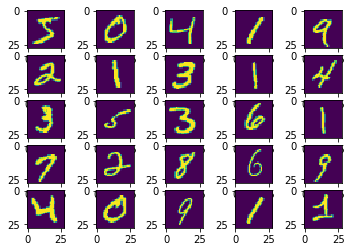

In [123]:
f = plt.figure()
for i in range(0, 25):
    f.add_subplot(5, 5, i + 1)
    plt.imshow(x_train[i])

plt.show(block=True)

Verify that the training set is balanced!

<br>

QUESTION: Why is it important to have a balanced training set?

QUESTION: How can imbalanced datasets be tackled in computer vision tasks?

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

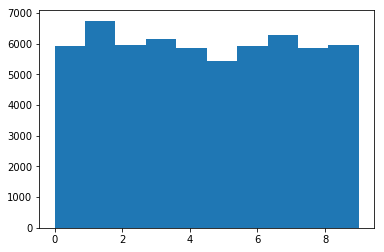

In [124]:
plt.hist(y_train)

# Question 1: Weil das Model dann nur gut auf die Werte trainiert wird, die auch häufig im Dataset vorkommen
# Wenn das Dataset zB zu 99% aus 0en besteht, kann unser Model am Ende gut 0en erkennen, aber alles andere nicht mehr

# Question 2: "Under-Sampling": Daten aus der Klasse löschen, die overbalanced ist (NUR WENN MAN GENUG DATEN HAT!)
# "Over-Sampling": Neue Daten augmentieren (z.B. durch GAN, spiegeln, verzerren, etc)

Prepare the MNIST dataset to properly learn a classifier! Preprocess the images and labels

<br>

QUESTION: Why is it beneficial to convert the categorical labels to one-hot vectors?

QUESTION: Why is it beneficial to normalize the input images?

<br>

Hint: If you are interested compare the model training with and without normalizing the input images.

In [125]:
# Question 1: One-Hot Vektoren sind ausdrucksstärker als kategorische integer Repräsentation. Besser unterteilte Ausgabe (10 Ausgaben mit Soft-max Wahrscheinlichkeit, anstatt 1 Ausgabe)
# Question 2:

# Normalize and flatten the images
def normalize(image):
    return image.astype(np.float32) / 255.

def flattenDataset(dataset):
    data = []
    for image in dataset:
        data.append(image.flatten())
    return np.array(data)

x_train_normalized = flattenDataset(np.apply_along_axis(normalize, 2, x_train))
x_test_normalized = flattenDataset(np.apply_along_axis(normalize, 2, x_test))


# One-hot encode the labels

y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]


## Learning a mlp


Define an arbitrary mlp!

In [126]:
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

Define hyperparameters, cost function (loss) and optimizer!

In [127]:
eta = 0.001
optimizer = tf.keras.optimizers.Adam(eta)
loss = tf.keras.losses.CategoricalCrossentropy()
epochs=20

Compile the model and train it on the training set!

In [128]:
mlp.compile(optimizer=optimizer, loss=loss, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.CategoricalCrossentropy()])
mlp.fit(x=x_train_normalized, y=y_train_one_hot, epochs=epochs)


Epoch 1/20
1875/1875 [==============================] - 2s 743us/step - loss: 0.4317 - categorical_accuracy: 0.8773 - categorical_crossentropy: 0.4317

Evaluate the performance of your classifier! It should achieve high accuracy (> 95%) on the test set!

You might adjust the model architecture and/or the hyperparameters if you don't make it above 95% accuracy.

In [129]:
results = mlp.evaluate(x_test_normalized, y_test_one_hot)
print("test loss, test acc: ", results)

313/313 [==============================] - 0s 567us/step - loss: 0.1089 - categorical_accuracy: 0.9778 - categorical_crossentropy: 0.1089
test loss, test acc:  [0.10889924317598343, 0.9778000116348267, 0.10889924317598343]


Plot the first 25 misclassified test images and contrast its predicted values with the true labels!

Can you spot some images where even humans have to guess?

Which digit is the most difficult for your model to predict?

In [162]:
# Make predictions
predictions = mlp.predict(x_test_normalized)

# Convert predictions and test labels back to categorical
prediction_categorical_labels = np.array([np.argmax(prediction) for prediction in predictions])
# categorical test labels: y_test

# Find all misclassified test images
wrong_classified_indices = [i for i,v in enumerate(prediction_categorical_labels) if prediction_categorical_labels[i] != y_test[i]]
wrong_classified_classes = [v for i,v in enumerate(prediction_categorical_labels) if prediction_categorical_labels[i] != y_test[i]]

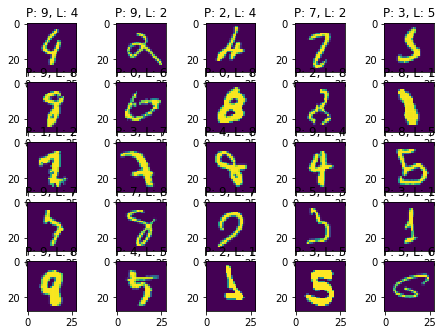

In [160]:
# Plot/Print the findings
f = plt.figure()
for i,v in enumerate(wrong_classified_indices[:25]):
    subplot = f.add_subplot(5, 5, i + 1)
    subplot.set_title(f"P: {prediction_categorical_labels[v]}, L: {y_test[v]}")
    plt.imshow(x_test[v])

plt.subplots_adjust(left=1, right=2, top=7, bottom=6)
plt.show(block=True)


In [163]:
# Count the misclassified images
print(len(wrong_classified_indices))

class_names, counts = np.unique(wrong_classified_classes, return_counts=True)
print(dict(zip(class_names, counts)))


222
{0: 20, 1: 6, 2: 30, 3: 27, 4: 25, 5: 15, 6: 19, 7: 18, 8: 20, 9: 42}
